In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_hub as hub
import time

# Шлях до директорії з тренувальними даними
train_data_dir = './train'

# Шлях до директорії з тестовими даними
test_data_dir = './test'

# Класи, які вибрали для класифікації
selected_classes = ['pizza', 'hamburger', 'ice_cream']

# Розмір зображення, який планується використовувати для моделі
image_size = (224, 224)

# Завантаження та попередня обробка даних
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes
)

# Функція для створення моделі
def create_model():
    model = models.Sequential()
    model.add(EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(selected_classes), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Модель 1
model1 = create_model()

# Тренування моделі 1
start_time = time.time()
history1 = model1.fit(train_generator, validation_data=validation_generator, epochs=10)
end_time = time.time()
training_time1 = end_time - start_time

# Оцінка моделі 1 на тестовому наборі
test_loss1, test_accuracy1 = model1.evaluate(test_generator)

# Модель 2 (змініть архітектуру або гіперпараметри)
model2 = create_model()

# Тренування моделі 2
start_time = time.time()
history2 = model2.fit(train_generator, validation_data=validation_generator, epochs=10)
end_time = time.time()
training_time2 = end_time - start_time

# Оцінка моделі 2 на тестовому наборі
test_loss2, test_accuracy2 = model2.evaluate(test_generator)

# Модель 3 (змініть архітектуру або гіперпараметри)
model3 = create_model()

# Тренування моделі 3
start_time = time.time()
history3 = model3.fit(train_generator, validation_data=validation_generator, epochs=10)
end_time = time.time()
training_time3 = end_time - start_time

# Оцінка моделі 3 на тестовому наборі
test_loss3, test_accuracy3 = model3.evaluate(test_generator)

# Transfer Learning (використовуйте EfficientNet з TensorFlow Hub)
hub_model = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

model_transfer_learning = models.Sequential([
    hub.KerasLayer(hub_model, trainable=False),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(selected_classes), activation='softmax')
])

model_transfer_learning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі Transfer Learning
start_time = time.time()
history_transfer_learning = model_transfer_learning.fit(train_generator, validation_data=validation_generator, epochs=10)
end_time = time.time()
training_time_transfer_learning = end_time - start_time

# Оцінка моделі Transfer Learning на тестовому наборі
test_loss_transfer_learning, test_accuracy_transfer_learning = model_transfer_learning.evaluate(test_generator)

# Виведення результатів
print("\nModel 1:")
print(f"Test Accuracy: {test_accuracy1}, Training Time: {training_time1} seconds")

print("\nModel 2:")
print(f"Test Accuracy: {test_accuracy2}, Training Time: {training_time2} seconds")

print("\nModel 3:")
print(f"Test Accuracy: {test_accuracy3}, Training Time: {training_time3} seconds")

print("\nTransfer Learning Model:")
print(f"Test Accuracy: {test_accuracy_transfer_learning}, Training Time: {training_time_transfer_learning} seconds")


Found 1800 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
16705208/16705208 [==============================] - 3s 0us/step
Epoch 1/10
57/57 [==============================] - 223s 4s/step - loss: 0.3585 - accuracy: 0.8722 - val_loss: 1.7754 - val_accuracy: 0.3333
Epoch 2/10
57/57 [==============================] - 237s 4s/step - loss: 0.1828 - accuracy: 0.9367 - val_loss: 1.6981 - val_accuracy: 0.3333
Epoch 3/10
57/57 [==============================] - 220s 4s/step - loss: 0.1284 - accuracy: 0.9533 - val_loss: 1.1956 - val_accuracy: 0.3356
Epoch 4/10
57/57 [==============================] - 270s 5s/step - loss: 0.1118 - accuracy: 0.9589 - val_loss: 1.3851 - val_accuracy: 0.3333
Epoch 5/10
57/57 [==============================] - 811s 14s/step - loss: 0.0859 - accuracy: 0.9711 - val_loss: 1.2823 - val_accuracy: 0.3289
Epoch 6/10
57/57 [==============================] - 457s 8s/step - loss: 0.0326 - accuracy: 0.9856 - val_

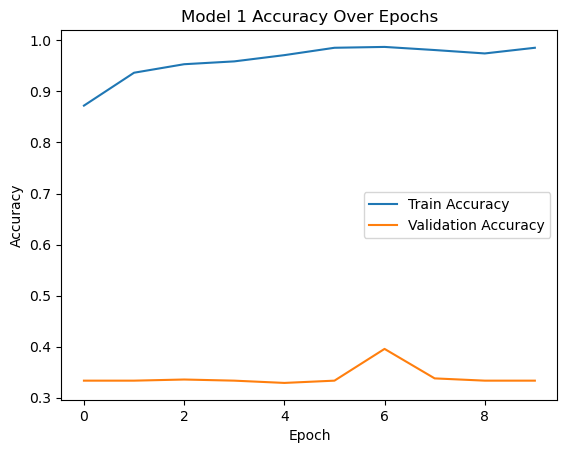

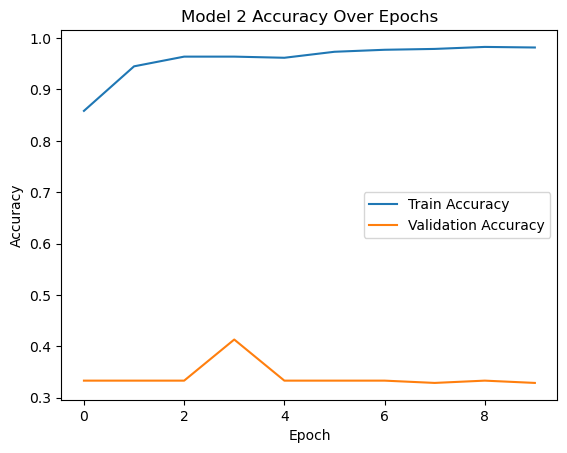

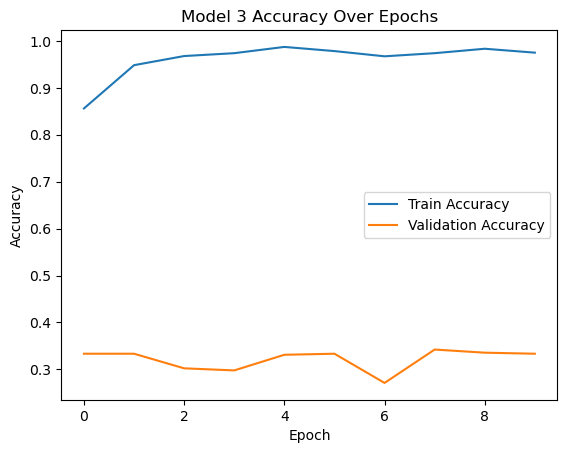

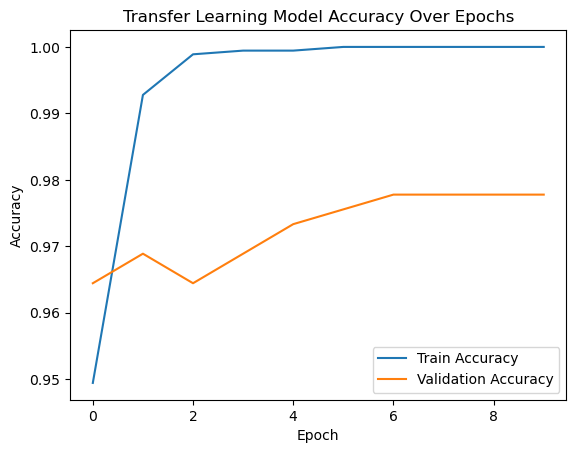

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd



# Графіки точності моделей
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history1, 'Model 1')
plot_accuracy(history2, 'Model 2')
plot_accuracy(history3, 'Model 3')
plot_accuracy(history_transfer_learning, 'Transfer Learning Model')
